In [34]:
import torchvision
from torchvision.models import *
from torch import nn
import torch
import matplotlib.pyplot as plt
import cv2
import numpy as np
import random, math

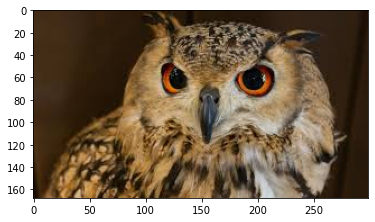

In [9]:
img = cv2.imread("/Users/kanoumotoharu/Downloads/jarg0ergjjraev.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [133]:
def augment_hsv(img, hgain=5, sgain=30, vgain=30):
    hsv_augs = np.random.uniform(-1, 1, 3) * [hgain, sgain, vgain]  # random gains
    hsv_augs *= np.random.randint(0, 2, 3)  # random selection of h, s, v
    hsv_augs = hsv_augs.astype(np.int16)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).astype(np.int16)

    img_hsv[..., 0] = (img_hsv[..., 0] + hsv_augs[0]) % 180
    img_hsv[..., 1] = np.clip(img_hsv[..., 1] + hsv_augs[1], 0, 255)
    img_hsv[..., 2] = np.clip(img_hsv[..., 2] + hsv_augs[2], 0, 255)

    cv2.cvtColor(img_hsv.astype(img.dtype), cv2.COLOR_HSV2BGR, dst=img)  # no return needed


def get_aug_params(value, center=0):
    if isinstance(value, float) or  isinstance(value, int):
        return random.uniform(center - value, center + value)
    elif len(value) == 2:
        return random.uniform(value[0], value[1])
    else:
        raise ValueError(
            "Affine params should be either a sequence containing two values\
                          or single float values. Got {}".format(
                value
            )
        )


def get_affine_matrix(
    target_size,
    degrees=10,
    translate=0.1,
    scales=0.1,
    shear=10,
    center=(0,0),
    not_use_shear=False,
):
    twidth, theight = target_size

    # Rotation and Scale
    angle = get_aug_params(degrees)
    scale = get_aug_params(scales, center=1.0)

    if scale <= 0.0:
        raise ValueError("Argument scale should be positive")

    R = cv2.getRotationMatrix2D(angle=angle, center=center, scale=scale)

    M = np.ones([2, 3])
    # Shear
    shear_x = math.tan(get_aug_params(shear) * math.pi / 180)
    shear_y = math.tan(get_aug_params(shear) * math.pi / 180)

    M[0] = R[0] + shear_y * R[1]
    M[1] = R[1] + shear_x * R[0]

    # Translation
    translation_x = get_aug_params(translate) * twidth  # x translation (pixels)
    translation_y = get_aug_params(translate) * theight  # y translation (pixels)

    M[0, 2] = translation_x
    M[1, 2] = translation_y
    if not_use_shear:
        return R, scale
    return M, scale

In [134]:
img = cv2.imread("/Users/kanoumotoharu/Downloads/jarg0ergjjraev.jpg")
img.shape

(168, 299, 3)

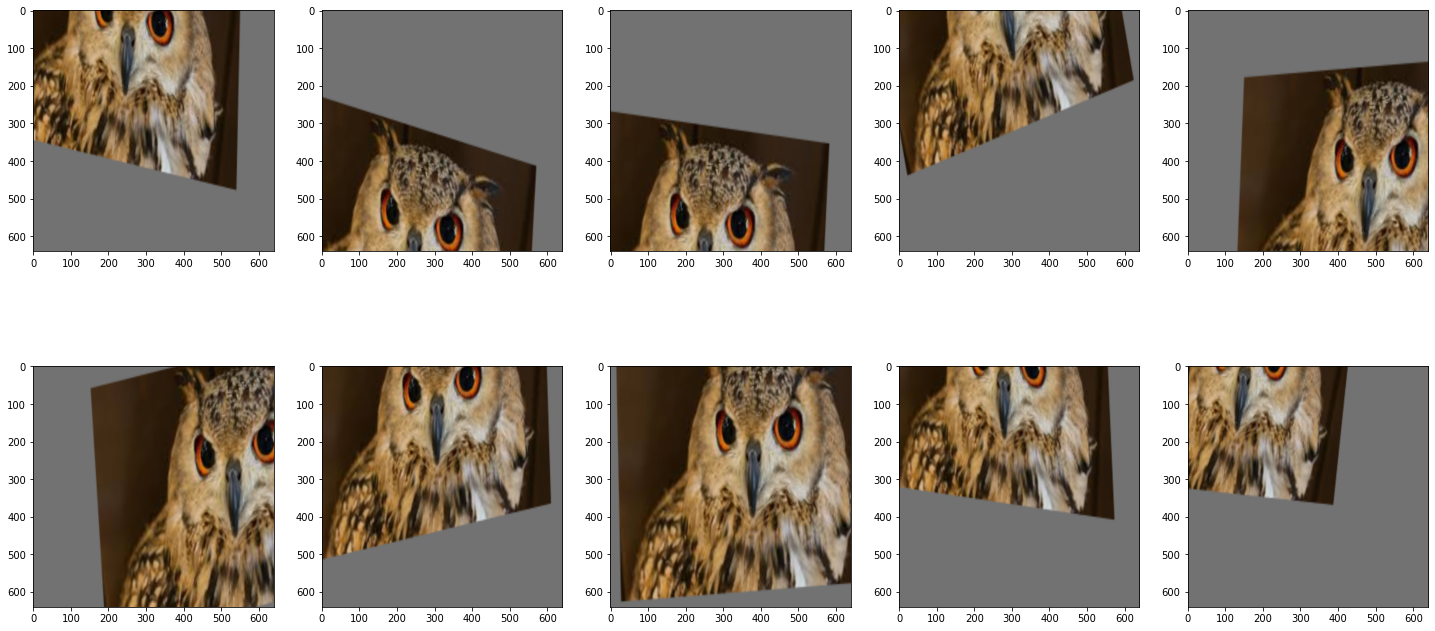

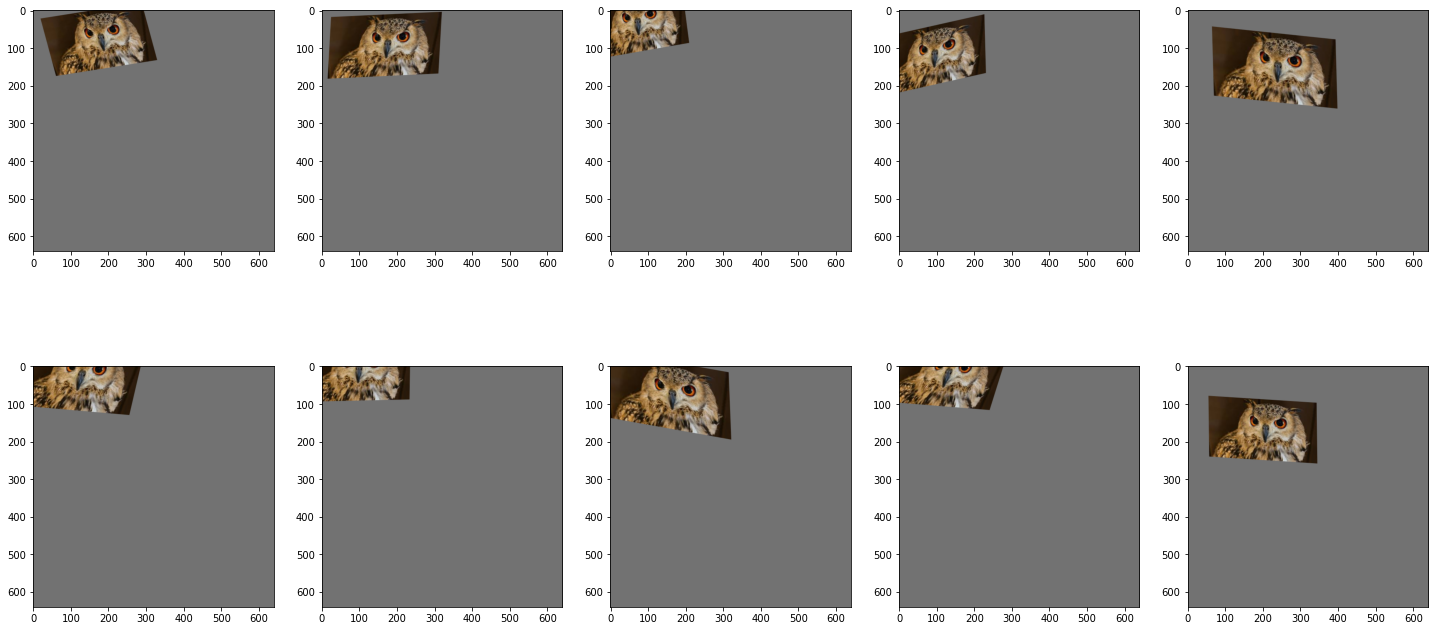

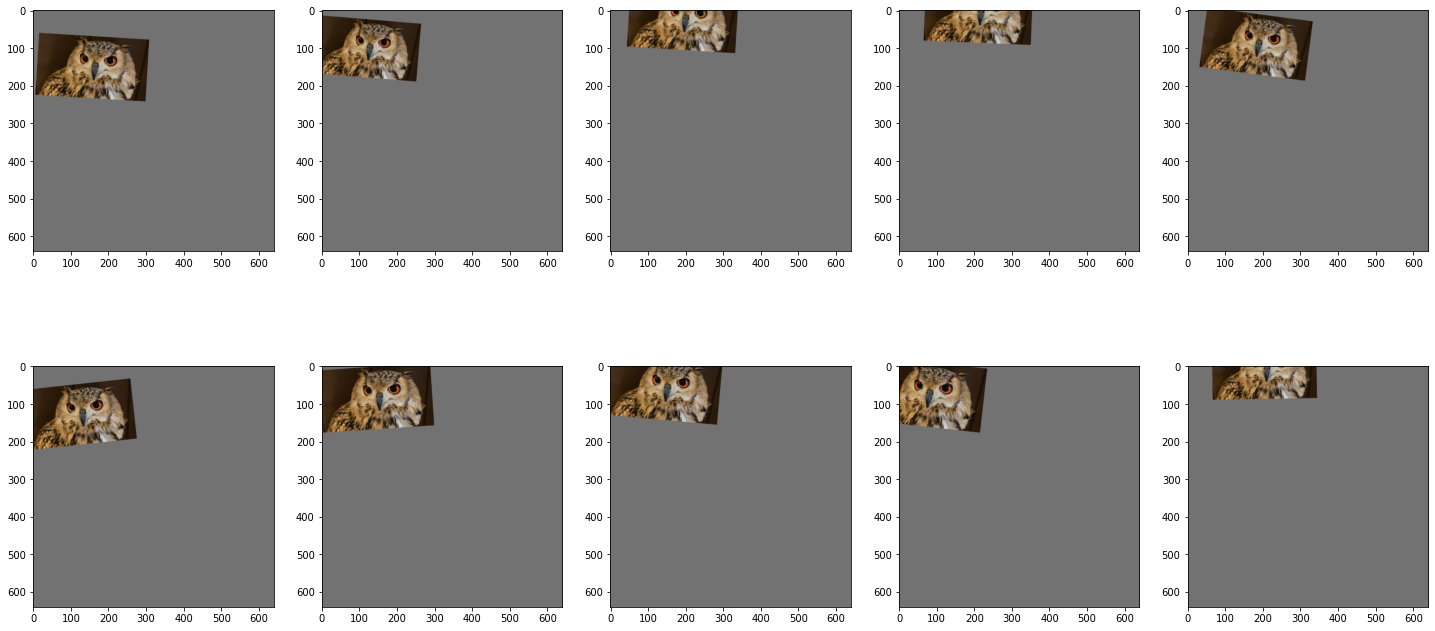

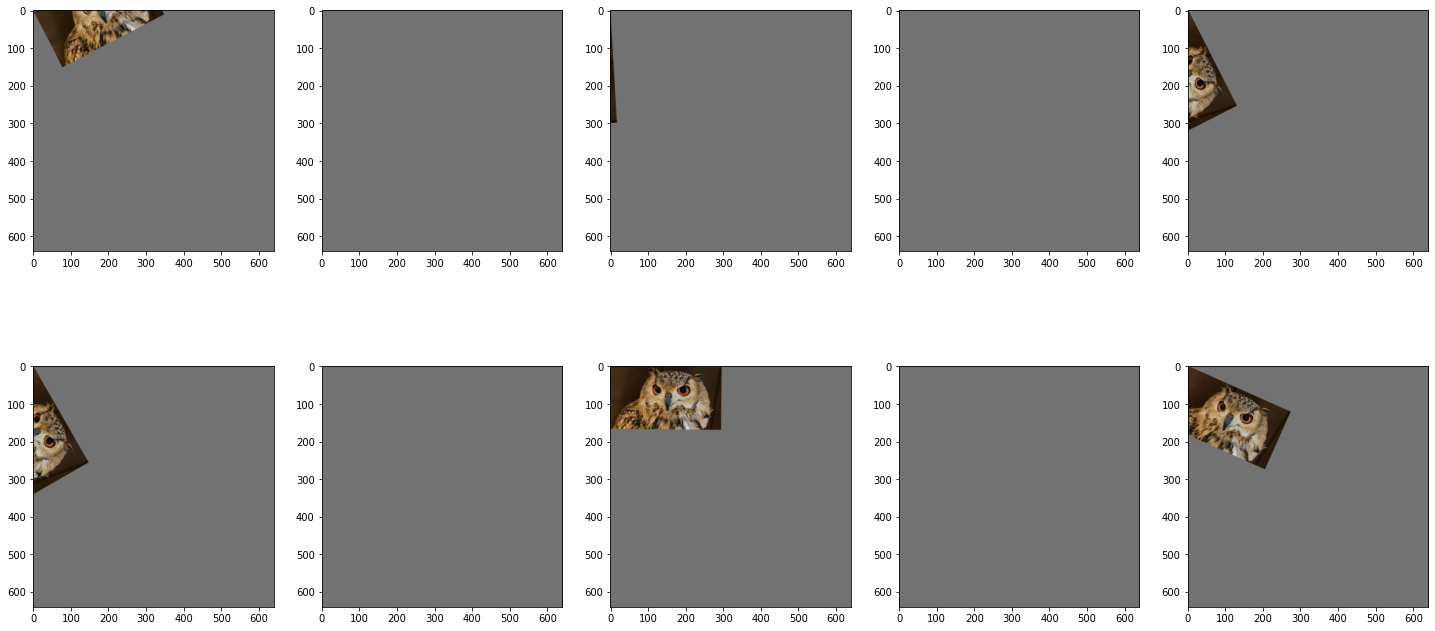

In [136]:
img = cv2.imread("/Users/kanoumotoharu/Downloads/jarg0ergjjraev.jpg")
#img = img.astype(np.uint8)
#img = img.astype(np.float32)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

height, width = img.shape[:2]
center = (width/2, height/2)

fig, axs = plt.subplots(2,5, figsize=(25,12));axs = [a for ax in axs for a in ax]
for ax in axs:
    M, scale = get_affine_matrix(target_size=(800,800), degrees=10, scales=0.1, center=center)
    affine_img = cv2.warpAffine(img, M=M, dsize=(width, height),borderValue=(114, 114, 114))
    affine_img = cv2.resize(affine_img, dsize=(640, 640))
    ax.imshow(affine_img)
    
fig, axs = plt.subplots(2,5, figsize=(25,12));axs = [a for ax in axs for a in ax]
for ax in axs:
    M, scale = get_affine_matrix(target_size=(800,800))
    affine_img = cv2.warpAffine(img, M=M, dsize=(640, 640),borderValue=(114, 114, 114))
    #affine_img = cv2.resize(affine_img, dsize=(640, 640))
    ax.imshow(affine_img)
    
fig, axs = plt.subplots(2,5, figsize=(25,12));axs = [a for ax in axs for a in ax]
for ax in axs:
    M, scale = get_affine_matrix(target_size=(800,800), shear=0.01)
    affine_img = cv2.warpAffine(img, M=M, dsize=(640, 640),borderValue=(114, 114, 114))
    #affine_img = cv2.resize(affine_img, dsize=(640, 640))
    ax.imshow(affine_img)
    
fig, axs = plt.subplots(2,5, figsize=(25,12));axs = [a for ax in axs for a in ax]
for ax in axs:
    M, scale = get_affine_matrix(target_size=(800,800), not_use_shear=True, degrees=180, scales=0.05,)
    affine_img = cv2.warpAffine(img, M=M, dsize=(640, 640),borderValue=(114, 114, 114))
    #affine_img = cv2.resize(affine_img, dsize=(640, 640))
    ax.imshow(affine_img)

In [94]:
cv2.ROTATE_90_COUNTERCLOCKWISE

2

In [96]:
img_rotation = cv2.rotate(img, rotateCode=2)

In [106]:
def rotateImage( image, angle ):
    if image is not None:
        dst_image = cv2.CloneImage( image )

        rotate_around = (0,0)
        transl = cv2.CreateMat(2, 3, cv2.CV_32FC1 )

        matrix = cv2.GetRotationMatrix2D( rotate_around, angle, 1.0, transl )
        cv2.GetQuadrangleSubPix( image, dst_image, transl )
        cv2.GetRectSubPix( dst_image, image, rotate_around )

    return dst_image

In [107]:
rotateImage(img, 10)

AttributeError: module 'cv2' has no attribute 'CloneImage'

In [ ]:
cv2.getRotationMatrix2D(center=center, angle=45, scale=1)

In [3]:
model = resnet18()
model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(in_features=512, out_features=1)
a = torch.rand(5,1,16,16)
print(model(a).size())


model = resnet18()
model.conv1 = nn.Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
model.fc = nn.Linear(in_features=512, out_features=1)
a = torch.rand(5,3,16,16)
print(model(a).size())

torch.Size([5, 1])
torch.Size([5, 1])


In [4]:
a = cv2.imread('/Users/kanoumotoharu/Library/Mobile\ Documents/com\~apple\~Preview/Documents/IMG_0055.jpg')

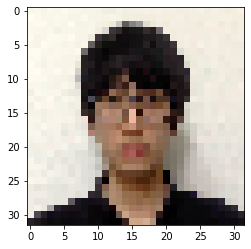

In [5]:
img = cv2.imread("/Users/kanoumotoharu/Downloads/V93CuifRDAYPNTd1617324479_1617324529.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (32,32))
plt.imshow(img)

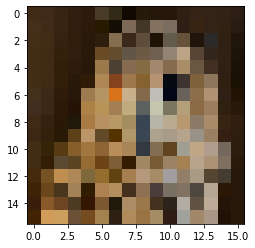

In [6]:
img = cv2.imread("/Users/kanoumotoharu/Downloads/jarg0ergjjraev.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (16,16))
plt.imshow(img)
plt.show()

In [6]:
a = torch.Tensor(10, 1).fill_(1.0)
b = torch.Tensor(10, 1).fill_(-1.0)

In [7]:
torch.mean(a*b)

tensor(-1.)

In [8]:
class Generator(nn.Module):
    def __init__(self, img_size, latent_dim, channels):
        super(Generator, self).__init__()

        self.init_size = img_size // 8
        self.conv_init_dim = 256
        self.l1 = nn.Sequential(nn.Linear(latent_dim, self.conv_init_dim * self.init_size ** 2))
        self.channels = channels

        self.conv_blocks = nn.Sequential(
            nn.Conv2d(self.conv_init_dim, self.conv_init_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Upsample(scale_factor=2),
            
            nn.Conv2d(self.conv_init_dim, self.conv_init_dim//2, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim//2, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Upsample(scale_factor=2),
            
            nn.Conv2d(self.conv_init_dim//2, self.conv_init_dim//4, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim//4, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Upsample(scale_factor=2),

            nn.Conv2d(self.conv_init_dim//4, self.conv_init_dim//4, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.conv_init_dim//4, self.conv_init_dim//4, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.conv_init_dim//4, self.channels, 3, stride=1, padding=1),
            nn.Tanh(),
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], self.conv_init_dim, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img
    
class Generator(nn.Module):
    def __init__(self, img_size, latent_dim, channels):
        super(Generator, self).__init__()

        self.init_size = img_size // 4
        self.conv_init_dim = 256
        self.l1 = nn.Sequential(nn.Linear(latent_dim, self.conv_init_dim * self.init_size ** 2))
        self.channels = channels

        self.conv_blocks = nn.Sequential(      
            nn.BatchNorm2d(self.conv_init_dim),
            
            nn.Conv2d(self.conv_init_dim, self.conv_init_dim, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim, 0.8),
            nn.Upsample(scale_factor=2),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.conv_init_dim, self.conv_init_dim//2, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim//2, 0.8),
            nn.Upsample(scale_factor=2),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Conv2d(self.conv_init_dim//2, self.conv_init_dim//4, 3, stride=1, padding=1),
            nn.BatchNorm2d(self.conv_init_dim//4, 0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.conv_init_dim//4, self.conv_init_dim//4, 3, stride=1, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(self.conv_init_dim//4, self.channels, 3, stride=1, padding=1),
            nn.Tanh(),
            )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], self.conv_init_dim, self.init_size, self.init_size)
        img = self.conv_blocks(out)
        return img

In [9]:
g_model = Generator(img_size=256, latent_dim=128, channels=3)
g_model(torch.rand(2,128)).size()

torch.Size([2, 3, 256, 256])

In [10]:
def loss_fn(targets, preds):
    loss = -torch.mean(targets*preds)
    return loss

In [11]:
targets = torch.Tensor(10, 1).fill_(1.0)
preds = torch.randn(10, 1).fill_(-10.0)
loss_fn(targets, preds)

tensor(10.)

In [12]:
targets = torch.Tensor(10, 1).fill_(-1.0)
preds = torch.randn(10, 1).fill_(-10.0)
loss_fn(targets, preds)

tensor(-10.)

In [13]:
class Discriminator(nn.Module):
    def __init__(self, img_size, channels):
        super(Discriminator, self).__init__()

        self.channels = channels
        def discriminator_block(in_filters, out_filters, bn=True):
            block = [nn.Conv2d(in_filters, out_filters, 3, 2, 1), nn.LeakyReLU(0.2, inplace=True), nn.Dropout2d(0.25)]
            if bn:
                block.append(nn.BatchNorm2d(out_filters, 0.8))
            return block

        self.model = nn.Sequential(
            *discriminator_block(self.channels, 16, bn=False),
            *discriminator_block(16, 32),
            *discriminator_block(32, 64),
            *discriminator_block(64, 128),
        )

        # The height and width of downsampled image
        ds_size = img_size // 2 ** 4
        self.adv_layer = nn.Linear(128 * ds_size ** 2, 1)
        self.sigmoid = nn.Sigmoid() 

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1)
        out = self.adv_layer(out)
        out = self.sigmoid(out)
        return out

In [15]:
d_model = Discriminator(128, 3)

In [16]:
d_model(torch.rand(2,3,128,128))

tensor([[0.5021],
        [0.5032]], grad_fn=<SigmoidBackward>)

In [30]:
input = torch.randn(3, requires_grad=True).unsqueeze(1)
print(input.shape)
target = torch.empty(3).random_(2).unsqueeze(1)
print(target.shape)

torch.Size([3, 1])
torch.Size([3, 1])


In [31]:
 m = nn.Sigmoid()
loss = nn.BCEWithLogitsLoss()
output = loss(input, target)
print(output)

tensor(1.5035, grad_fn=<BinaryCrossEntropyWithLogitsBackward>)


In [34]:
 m = nn.Sigmoid()
loss = nn.BCELoss()
output = loss(m(input).squeeze(1), target.squeeze(1))
print(output)

 m = nn.Sigmoid()
loss = nn.BCELoss()
output = loss(m(input), target)
print(output)

tensor(1.5035, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.5035, grad_fn=<BinaryCrossEntropyBackward>)
